In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib 

In [2]:
df = pd.read_csv('/kaggle/input/employee-attrition-data-prediction/employee_attrition_data.csv')
df.head()

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [3]:
df.isnull().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

**Analysis for the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [5]:
df.describe()

,Employee_ID,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,288.819436,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,0.000000,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,249.750000,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,499.500000,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,749.250000,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,999.000000,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [6]:
# Summary statistics for categorical variables
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

       Gender Department Job_Title
count    1000       1000      1000
unique      2          5         5
top      Male      Sales  Engineer
freq      506        209       214


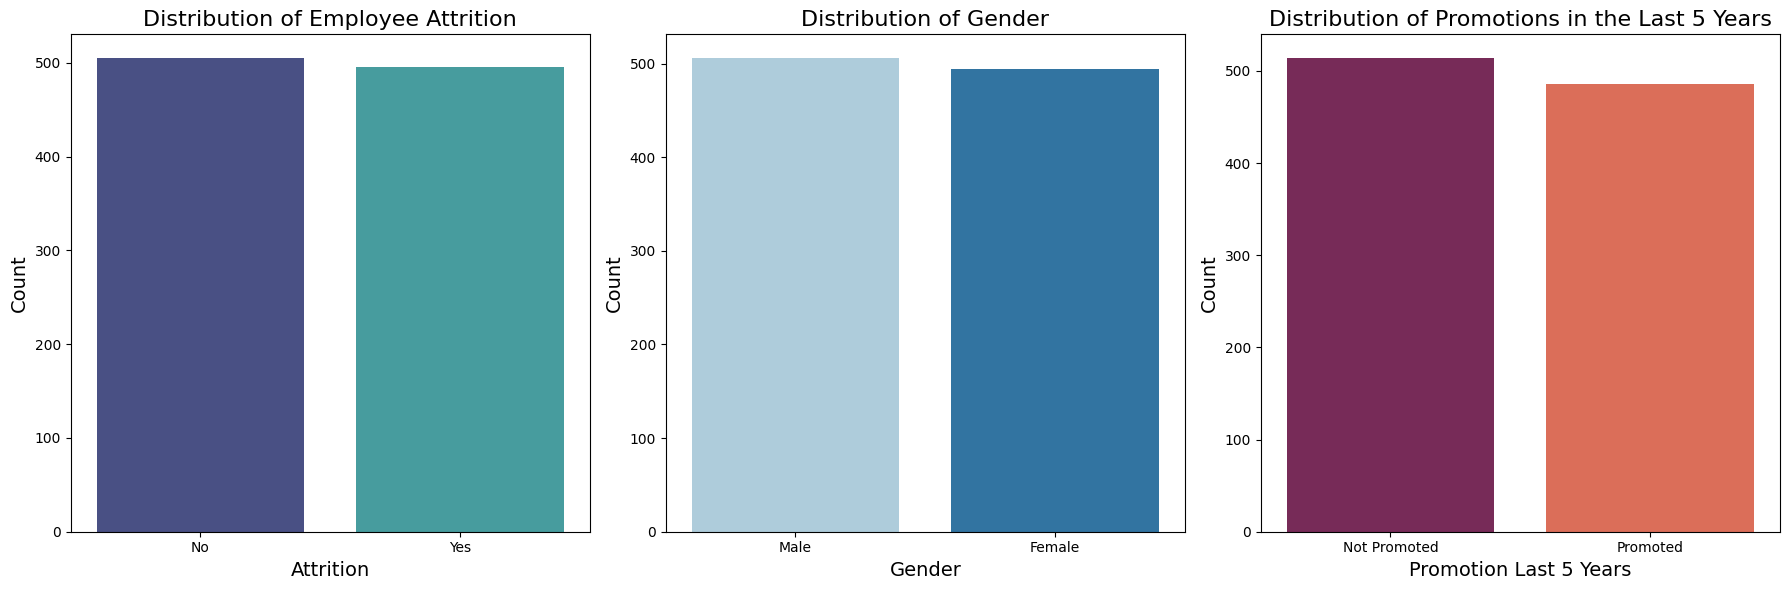

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Distribution of Attrition
sns.countplot(x='Attrition', data=df, palette='mako', ax=axes[0])
axes[0].set_title('Distribution of Employee Attrition', fontsize=16)
axes[0].set_xlabel('Attrition', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticks(ticks=[0, 1])
axes[0].set_xticklabels(['No', 'Yes'])

# Plot 2: Distribution of Gender
sns.countplot(x='Gender', data=df, palette='Paired', ax=axes[1])
axes[1].set_title('Distribution of Gender', fontsize=16)
axes[1].set_xlabel('Gender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)

# Plot 3: Distribution of Promotions in the Last 5 Years
sns.countplot(x='Promotion_Last_5Years', data=df, palette='rocket', ax=axes[2])
axes[2].set_title('Distribution of Promotions in the Last 5 Years', fontsize=16)
axes[2].set_xlabel('Promotion Last 5 Years', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].set_xticks(ticks=[0, 1])
axes[2].set_xticklabels(['Not Promoted', 'Promoted'])

plt.tight_layout()
plt.show()

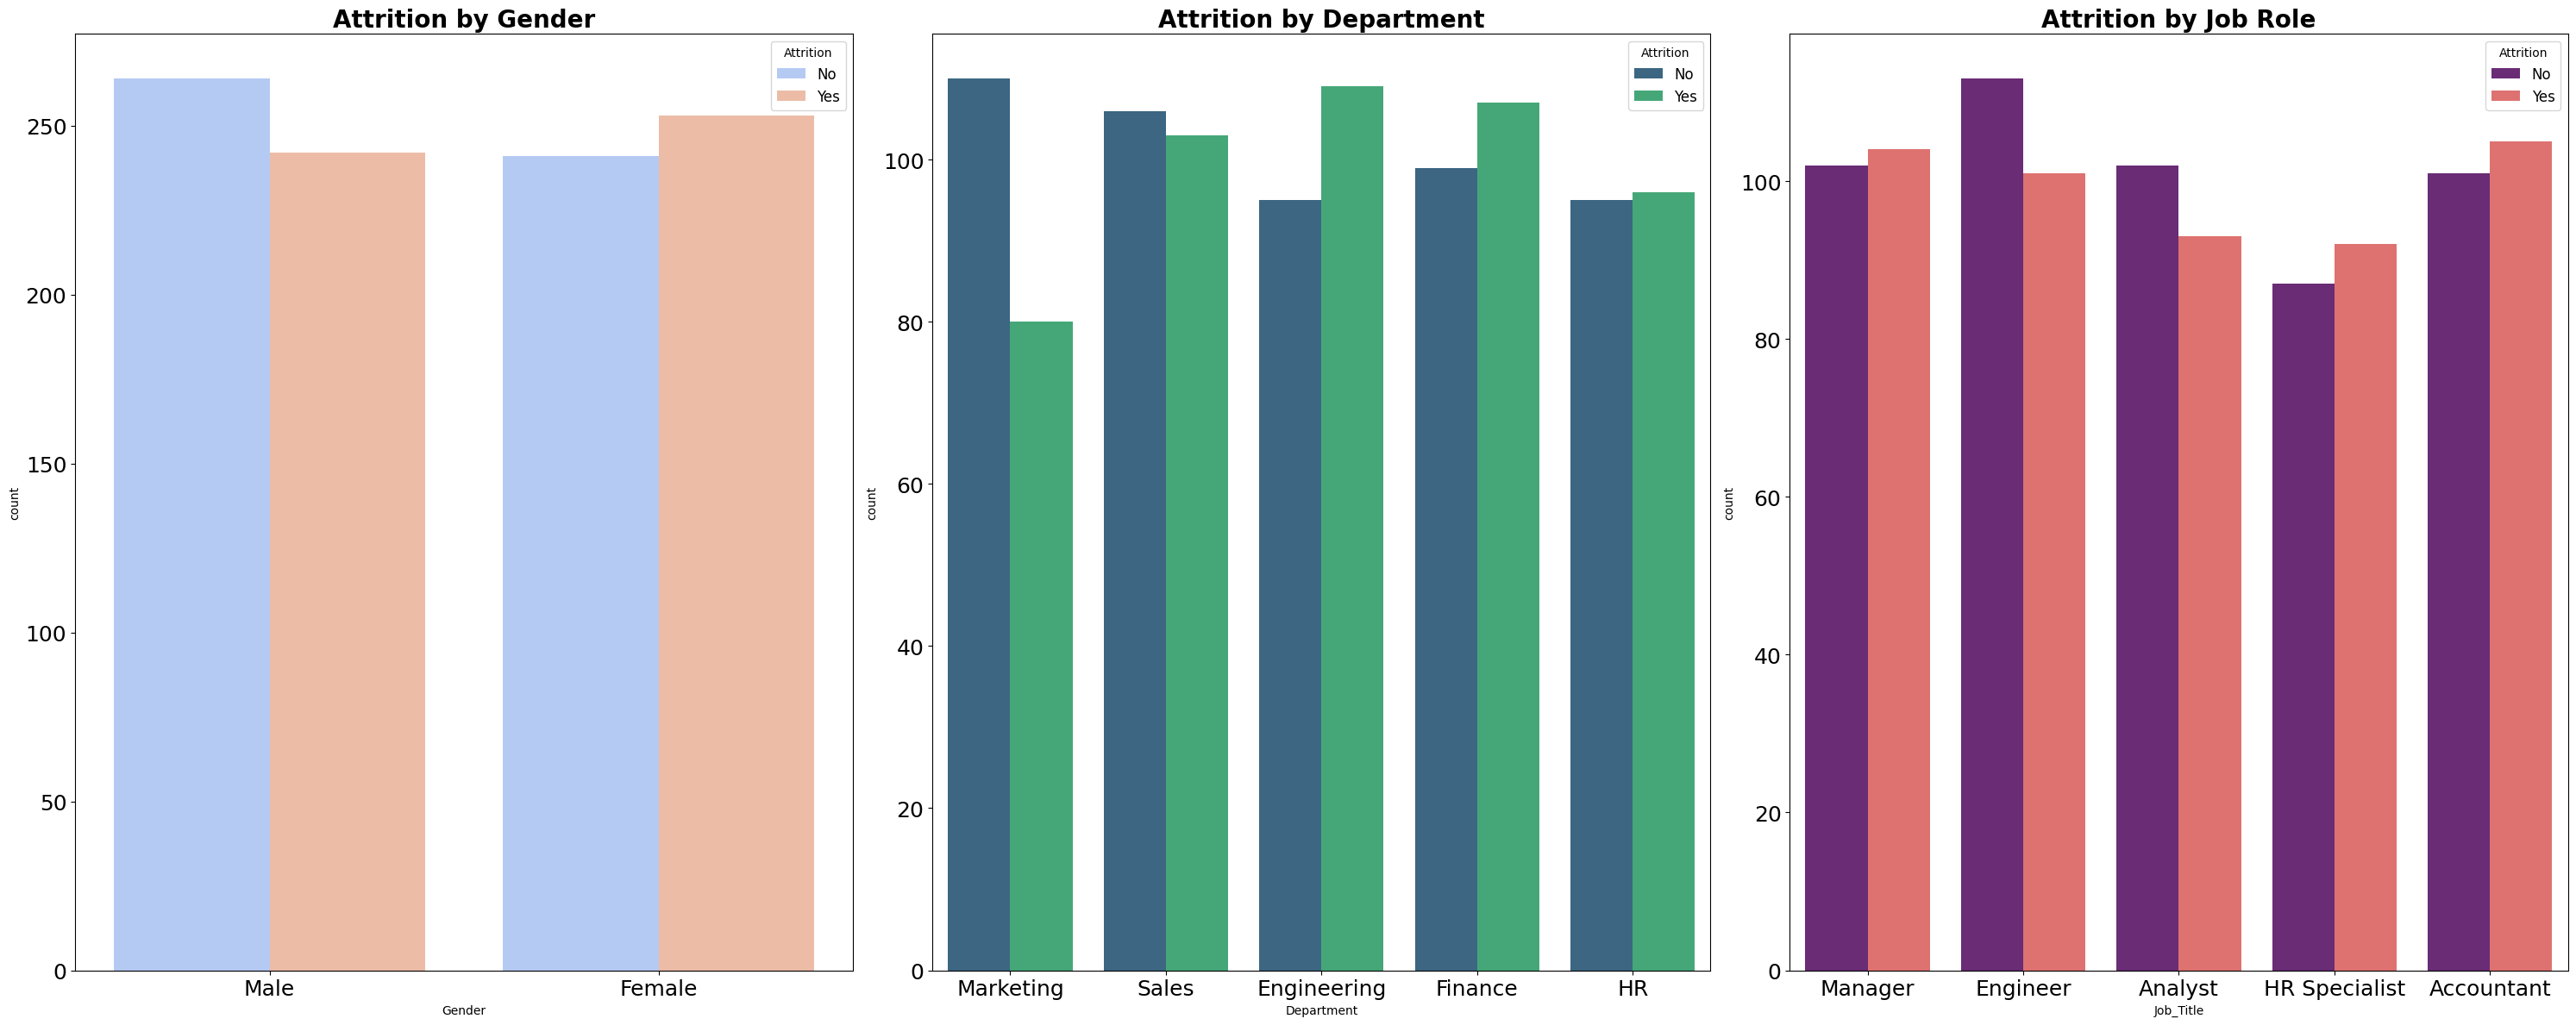

In [8]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(30, 12))

# Plot 1: Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Attrition by Gender',  fontsize=20, fontweight='bold')
# axes[0].set_xlabel('Gender', fontsize=14)
# axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='both', labelsize=18)
axes[0].legend(title='Attrition', labels=['No', 'Yes'], fontsize=12)

# Plot 2: Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Attrition by Department', fontsize=20, fontweight='bold')
# axes[1].set_xlabel('Department', fontsize=16)
# axes[1].set_ylabel('Count', fontsize=16)
axes[1].tick_params(axis='both', labelsize=18)
axes[1].legend(title='Attrition', labels=['No', 'Yes'], fontsize=12)

# Plot 3: Attrition by Job Role
sns.countplot(x='Job_Title', hue='Attrition', data=df, palette='magma', ax=axes[2])
axes[2].set_title('Attrition by Job Role', fontsize=20, fontweight='bold')
# axes[2].set_xlabel('Job Role', fontsize=16)
# axes[2].set_ylabel('Count', fontsize=16)
axes[2].tick_params(axis='both', labelsize=18)
axes[2].legend(title='Attrition', labels=['No', 'Yes'], fontsize=12)

plt.tight_layout()
plt.show()

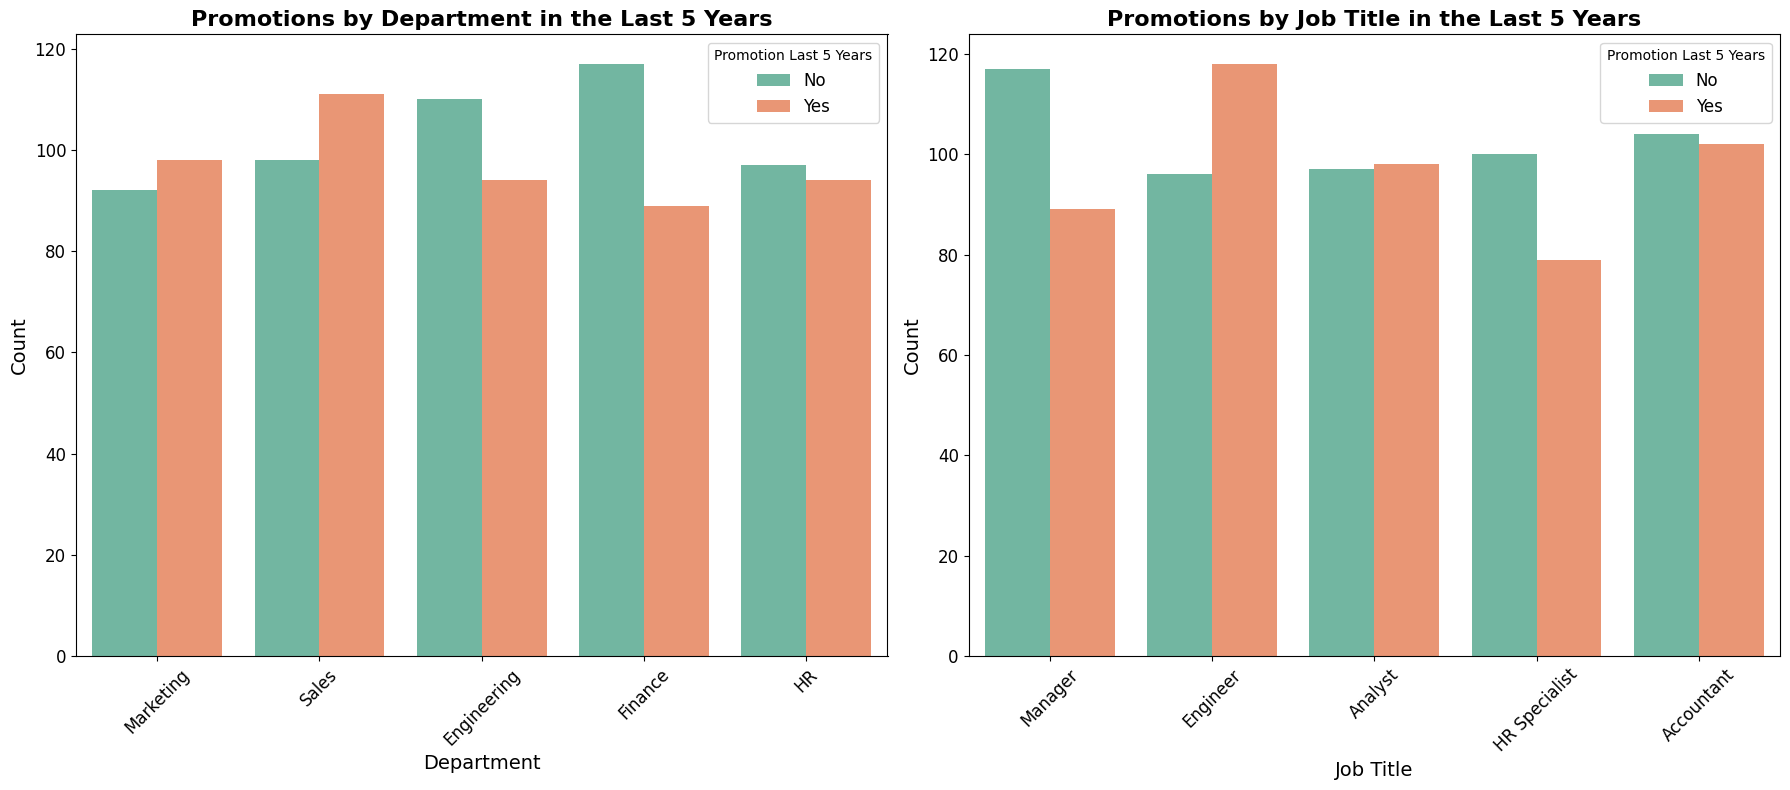

In [9]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Promotions by Department
sns.countplot(x='Department', hue='Promotion_Last_5Years', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Promotions by Department in the Last 5 Years', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Department', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(title='Promotion Last 5 Years', fontsize=12, labels=['No', 'Yes'])

# Plot 2: Promotions by Job Title
sns.countplot(x='Job_Title', hue='Promotion_Last_5Years', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Promotions by Job Title in the Last 5 Years', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Job Title', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(title='Promotion Last 5 Years', fontsize=12, labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

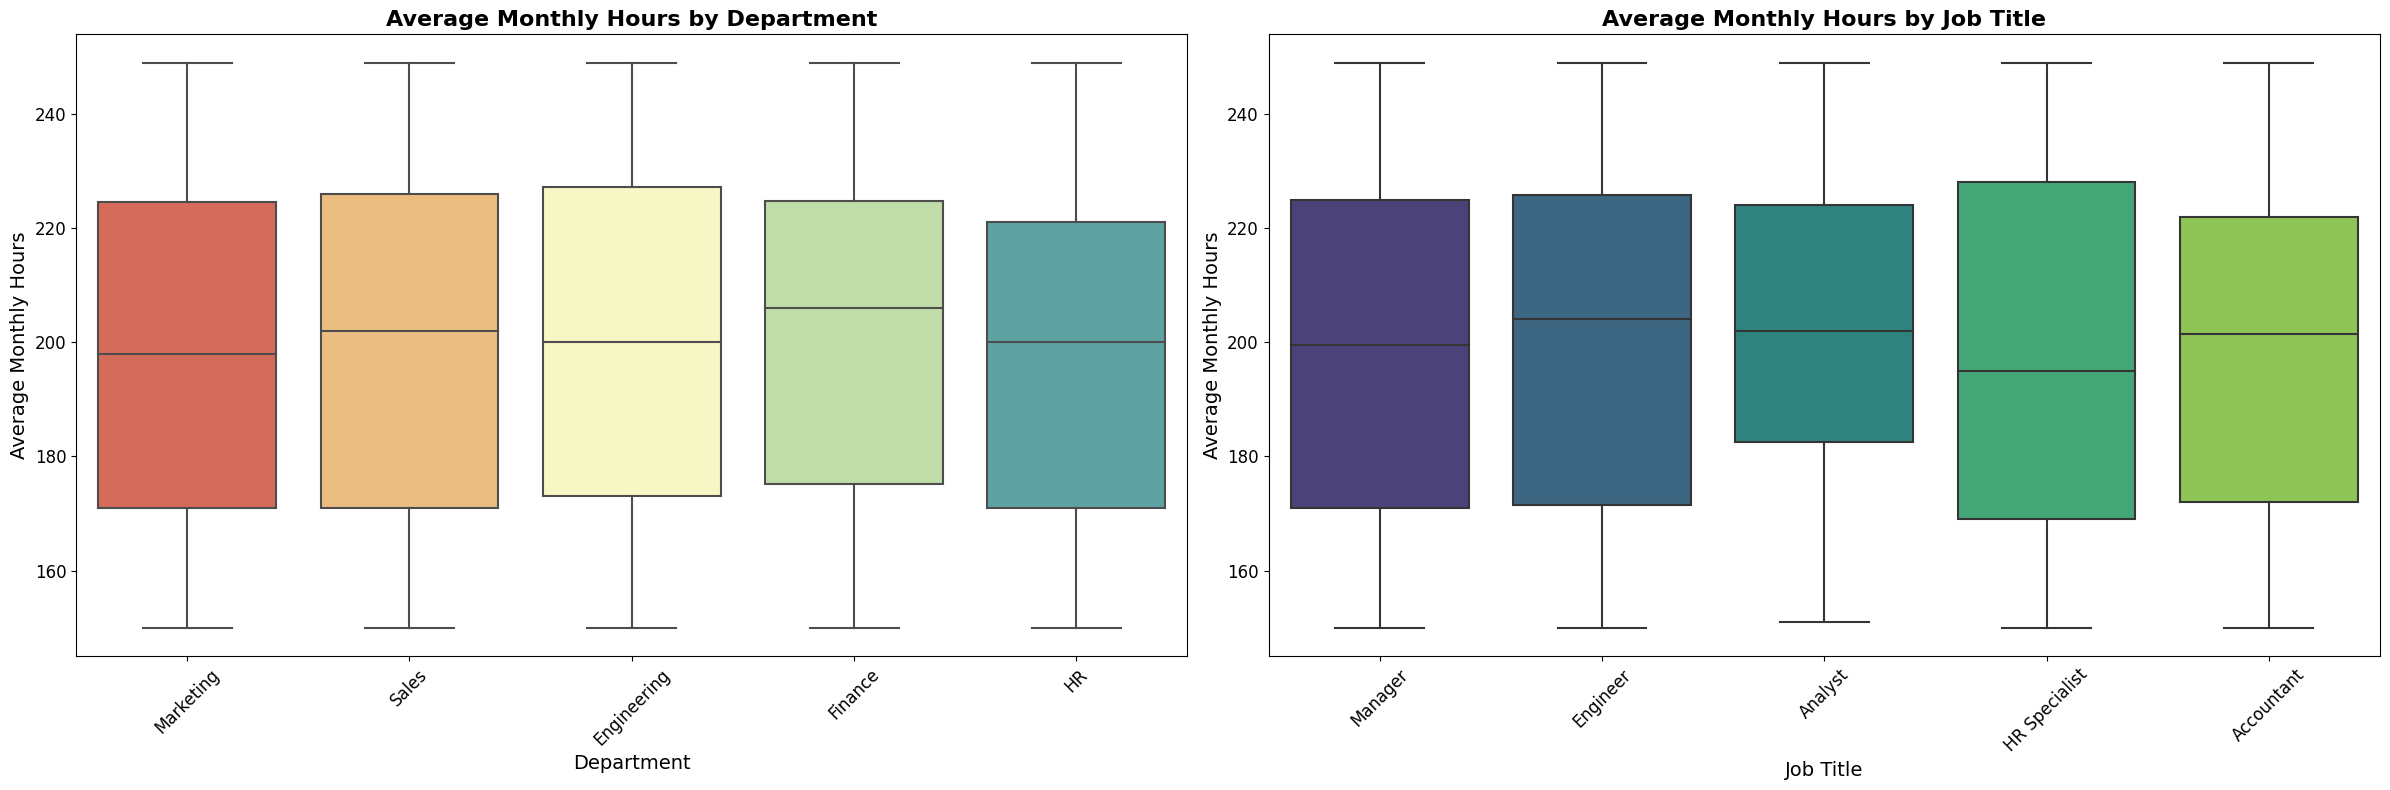

In [10]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# Plot 1: Average Monthly Hours by Department
sns.boxplot(x='Department', y='Average_Monthly_Hours', data=df, palette='Spectral', ax=axes[0])
axes[0].set_title('Average Monthly Hours by Department', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Department', fontsize=14)
axes[0].set_ylabel('Average Monthly Hours', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Plot 2: Average Monthly Hours by Job Title
sns.boxplot(x='Job_Title', y='Average_Monthly_Hours', data=df, palette='viridis', ax=axes[1])
axes[1].set_title('Average Monthly Hours by Job Title', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Job Title', fontsize=14)
axes[1].set_ylabel('Average Monthly Hours', fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

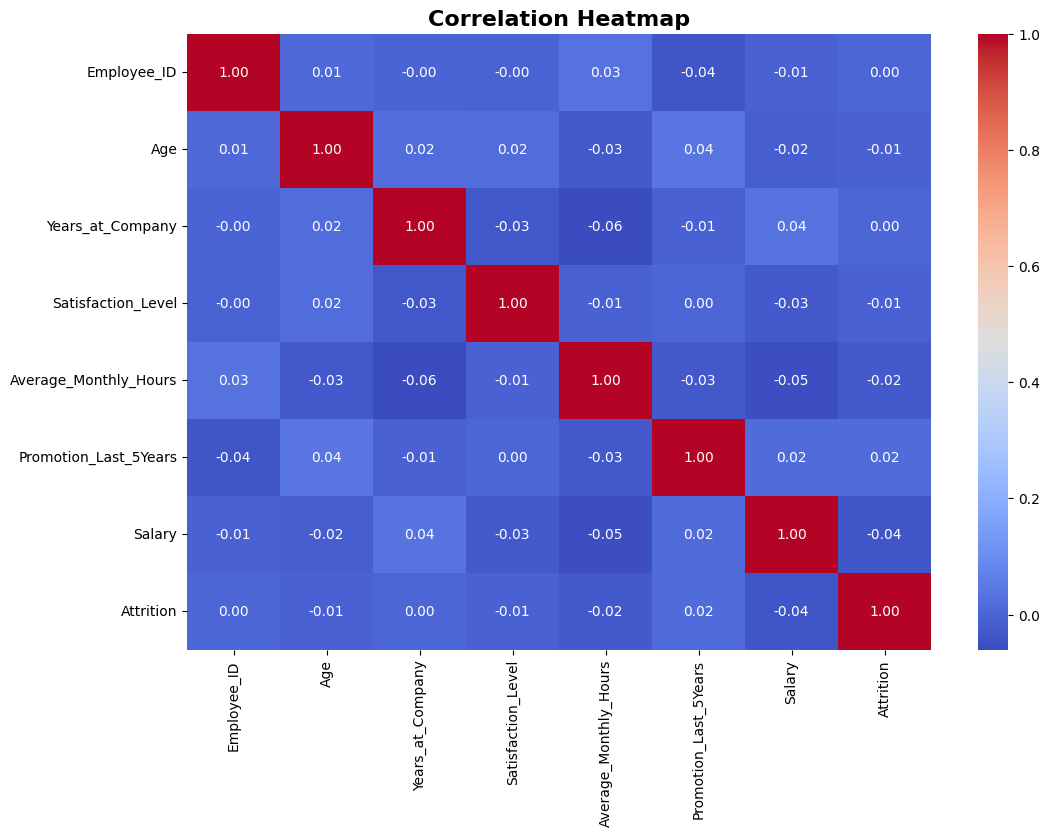

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


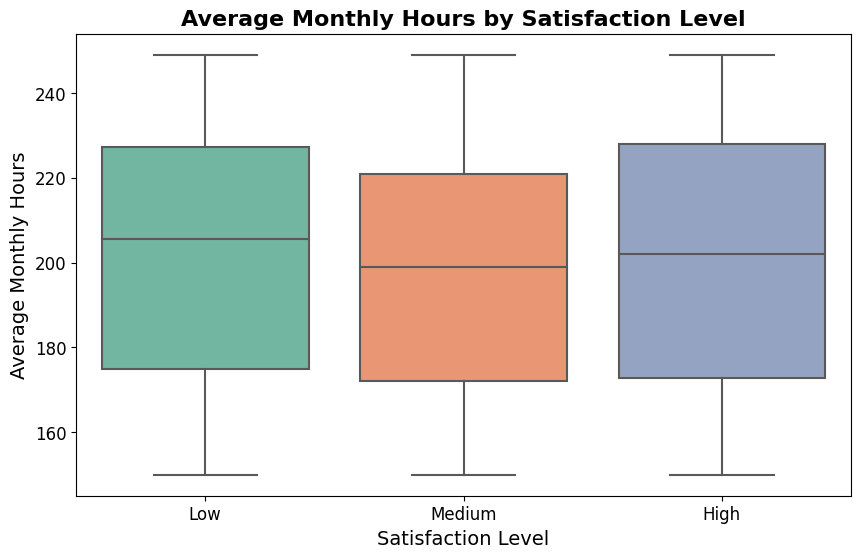

In [12]:
# Create bins for Satisfaction Level (e.g., Low, Medium, High)
df['Satisfaction_Level_Bins'] = pd.cut(df['Satisfaction_Level'], bins=[0, 0.3, 0.7, 1], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction_Level_Bins', y='Average_Monthly_Hours', data=df, palette='Set2')
plt.title('Average Monthly Hours by Satisfaction Level', fontsize=16, fontweight='bold')
plt.xlabel('Satisfaction Level', fontsize=14)
plt.ylabel('Average Monthly Hours', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()